In [7]:
import pandas as pd
import numpy as np
import nltk
import pickle
import pyLDAvis.sklearn
from collections import Counter
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

<h2>Number of Tweets by Topic

In [8]:
cleaned_df = pd.read_pickle('df_clean.pkl')
cleaned_df.head(5)

created_at  followers  hashtagged  \
id                                                              
688103460634415104 2016-01-15 21:00:24        265        True   
688103392388882433 2016-01-15 21:00:07        968        True   
688103487205322752 2016-01-15 21:00:30        189        True   
688103398462205952 2016-01-15 21:00:09       8053        True   
688103509611294721 2016-01-15 21:00:35          7        True   

                             location    screen_name  \
id                                                     
688103460634415104  Sugar Land, Texas      zachsciba   
688103392388882433               None        scootey   
688103487205322752     s. pasadena,ca      steve1204   
688103398462205952  Lansing, Michigan   ProgressMich   
688103509611294721               None  marcgilbert77   

                                                                 text  \
id                                                                      
688103460634415104  RT @TheDailyShow: #FlintWaterCrisis could have...   
688103392388882433  You can thank the Republican party for this #M...   
688103487205322752  RT @TheDailyShow: #FlintWaterCrisis could have...   
688103398462205952  Snyder still won’t say when he knew about #Fli...   
688103509611294721  RT @TheDailyShow: #FlintWaterCrisis could have...   

                    verified  \
id                             
688103460634415104     False   
688103392388882433     False   
688103487205322752     False   
688103398462205952     False   
688103509611294721     False   

                                                       cleaned_tweets  \
id                                                                      
688103460634415104  #flintwatercrisis could have been prevented by...   
688103392388882433  you can thank the republican party for this #m...   
688103487205322752  #flintwatercrisis could have been prevented by...   
688103398462205952  snyder still wont say when he knew about #flin...   
688103509611294721  #flintwatercrisis could have been prevented by...   

                                                            tokenized  \
id                                                                      
688103460634415104  [#, flintwatercrisis, could, have, been, preve...   
688103392388882433  [you, can, thank, the, republican, party, for,...   
688103487205322752  [#, flintwatercrisis, could, have, been, preve...   
688103398462205952  [snyder, still, wont, say, when, he, knew, abo...   
688103509611294721  [#, flintwatercrisis, could, have, been, preve...   

                                                    stopwords_removed  \
id                                                                      
688103460634415104  [#, flintwatercrisis, could, prevented, easy, ...   
688103392388882433  [thank, republican, party, #, michigan, #, fli...   
688103487205322752  [#, flintwatercrisis, could, prevented, easy, ...   
688103398462205952  [snyder, still, wont, say, knew, #, flintwater...   
688103509611294721  [#, flintwatercrisis, could, prevented, easy, ...   

                                                             pos_tags  \
id                                                                      
688103460634415104  [(#, #), (flintwatercrisis, NN), (could, MD), ...   
688103392388882433  [(thank, JJ), (republican, JJ), (party, NN), (...   
688103487205322752  [(#, #), (flintwatercrisis, NN), (could, MD), ...   
688103398462205952  [(snyder, NN), (still, RB), (wont, JJ), (say, ...   
688103509611294721  [(#, #), (flintwatercrisis, NN), (could, MD), ...   

                                                          wordnet_pos  \
id                                                                      
688103460634415104  [(#, n), (flintwatercrisis, n), (could, n), (p...   
688103392388882433  [(thank, a), (republican, a), (party, n), (#, ...   
688103487205322752  [(#, n), (flintwatercrisis, n), (could, n), (p...   
688103398462205952  [(snyder,

In [10]:
cleaned_df['lemma_str'] = [' '.join(map(str, l)) for l in cleaned_df['lemmatized']]

In [11]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000, use_idf=True)
tfidf = tfidf_vectorizer.fit_transform(cleaned_df['lemma_str'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

In [12]:
doc_term_matrix_tfidf = pd.DataFrame(tfidf.toarray(), columns=list(tfidf_feature_names))
doc_term_matrix_tfidf

abc  absolutely  access  accountable  accuse  across  act  action  \
0       0.0         0.0     0.0          0.0     0.0     0.0  0.0     0.0   
1       0.0         0.0     0.0          0.0     0.0     0.0  0.0     0.0   
2       0.0         0.0     0.0          0.0     0.0     0.0  0.0     0.0   
3       0.0         0.0     0.0          0.0     0.0     0.0  0.0     0.0   
4       0.0         0.0     0.0          0.0     0.0     0.0  0.0     0.0   
...     ...         ...     ...          ...     ...     ...  ...     ...   
664770  0.0         0.0     0.0          0.0     0.0     0.0  0.0     0.0   
664771  0.0         0.0     0.0          0.0     0.0     0.0  0.0     0.0   
664772  0.0         0.0     0.0          0.0     0.0     0.0  0.0     0.0   
664773  0.0         0.0     0.0          0.0     0.0     0.0  0.0     0.0   
664774  0.0         0.0     0.0          0.0     0.0     0.0  0.0     0.0   

        activist  actually  ...  write  wrong  xiii  yall  year  yes  yet  \
0            0.0       0.0  ...    0.0    0.0   0.0   0.0   0.0  0.0  0.0   
1            0.0       0.0  ...    0.0    0.0   0.0   0.0   0.0  0.0  0.0   
2            0.0       0.0  ...    0.0    0.0   0.0   0.0   0.0  0.0  0.0   
3            0.0       0.0  ...    0.0    0.0   0.0   0.0   0.0  0.0  0.0   
4            0.0       0.0  ...    0.0    0.0   0.0   0.0   0.0  0.0  0.0   
...          ...       ...  ...    ...    ...   ...   ...   ...  ...  ...   
664770       0.0       0.0  ...    0.0    0.0   0.0   0.0   0.0  0.0  0.0   
664771       0.0       0.0  ...    0.0    0.0   0.0   0.0   0.0  0.0  0.0   
664772       0.0       0.0  ...    0.0    0.0   0.0   0.0   0.0  0.0  0.0   
664773       0.0       0.0  ...    0.0    0.0   0.0   0.0   0.0  0.0  0.0   
664774       0.0       0.0  ...    0.0    0.0   0.0   0.0   0.0  0.0  0.0   

        young  youre   yr  
0         0.0    0.0  0.0  
1         0.0    0.0  0.0  
2         0.0    0.0  0.0  
3         0.0    0.0  0.0  
4         0.0    0.0  0.0  
...       ...    ...  ...  
664770    0.0    0.0  0.0  
664771    0.0    0.0  0.0  
664772    0.0    0.0  0.0  
664773    0.0    0.0  0.0  
664774    0.0    0.0  0.0  

[664775 rows x 1000 columns]

In [13]:
nmf = NMF(n_components=10, random_state=0, alpha=.1).fit(tfidf)

In [15]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                           for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [16]:
no_top_words = 10
display_topics(nmf, tfidf_feature_names, no_top_words)

Topic 0:
water crisis donate bottle flint via epa official million help
Topic 1:
flintwatercrisis arrestgovsnyder rt http help need amp flintwater petition donate
Topic 2:
take still one bath friendly gallon reminder hour water flint
Topic 3:
lead poison resident kid black poor http hospital water child
Topic 4:
money clean go war drinking much iraq enough somehow provide
Topic 5:
flint people mi help amp like see need look city
Topic 6:
obama emergency declare president sign state federal declaration order aid
Topic 7:
michigan governor flint resign must people state city leadpoisoning statement
Topic 8:
clinton sander hillary debate bernie demdebate call democratic get vote
Topic 9:
snyder gov rick resign call email snyders governor testify congress


In [17]:
nmf_topic_values = nmf.transform(tfidf)
cleaned_df['nmf_topics'] = nmf_topic_values.argmax(axis=1)

In [18]:
nmf_remap = {
    0: 'Donate to help water crisis',
    1: 'Arrest Governor Snyder',
    2: 'Conserve Water',
    3: 'Black children\'s water is poisoned',
    4: 'Not enough funding going to Flint water crisis',
    5: 'Help Flint people',
    6: 'President Obama declares emergency in Michigan',
    7: 'Governor Snyder should resign',
    8: 'Democratic debate for votes',
    9: 'Governor Snyder shoudl resign and testify in front of Congress'
}

In [19]:
cleaned_df['nmf_topics'] = cleaned_df['nmf_topics'].map(nmf_remap)
cleaned_df.head(5)

created_at  followers  hashtagged  \
id                                                              
688103460634415104 2016-01-15 21:00:24        265        True   
688103392388882433 2016-01-15 21:00:07        968        True   
688103487205322752 2016-01-15 21:00:30        189        True   
688103398462205952 2016-01-15 21:00:09       8053        True   
688103509611294721 2016-01-15 21:00:35          7        True   

                             location    screen_name  \
id                                                     
688103460634415104  Sugar Land, Texas      zachsciba   
688103392388882433               None        scootey   
688103487205322752     s. pasadena,ca      steve1204   
688103398462205952  Lansing, Michigan   ProgressMich   
688103509611294721               None  marcgilbert77   

                                                                 text  \
id                                                                      
688103460634415104  RT @TheDailyShow: #FlintWaterCrisis could have...   
688103392388882433  You can thank the Republican party for this #M...   
688103487205322752  RT @TheDailyShow: #FlintWaterCrisis could have...   
688103398462205952  Snyder still won’t say when he knew about #Fli...   
688103509611294721  RT @TheDailyShow: #FlintWaterCrisis could have...   

                    verified  \
id                             
688103460634415104     False   
688103392388882433     False   
688103487205322752     False   
688103398462205952     False   
688103509611294721     False   

                                                       cleaned_tweets  \
id                                                                      
688103460634415104  #flintwatercrisis could have been prevented by...   
688103392388882433  you can thank the republican party for this #m...   
688103487205322752  #flintwatercrisis could have been prevented by...   
688103398462205952  snyder still wont say when he knew about #flin...   
688103509611294721  #flintwatercrisis could have been prevented by...   

                                                            tokenized  \
id                                                                      
688103460634415104  [#, flintwatercrisis, could, have, been, preve...   
688103392388882433  [you, can, thank, the, republican, party, for,...   
688103487205322752  [#, flintwatercrisis, could, have, been, preve...   
688103398462205952  [snyder, still, wont, say, when, he, knew, abo...   
688103509611294721  [#, flintwatercrisis, could, have, been, preve...   

                                                    stopwords_removed  \
id                                                                      
688103460634415104  [#, flintwatercrisis, could, prevented, easy, ...   
688103392388882433  [thank, republican, party, #, michigan, #, fli...   
688103487205322752  [#, flintwatercrisis, could, prevented, easy, ...   
688103398462205952  [snyder, still, wont, say, knew, #, flintwater...   
688103509611294721  [#, flintwatercrisis, could, prevented, easy, ...   

                                                             pos_tags  \
id                                                                      
688103460634415104  [(#, #), (flintwatercrisis, NN), (could, MD), ...   
688103392388882433  [(thank, JJ), (republican, JJ), (party, NN), (...   
688103487205322752  [(#, #), (flintwatercrisis, NN), (could, MD), ...   
688103398462205952  [(snyder, NN), (still, RB), (wont, JJ), (say, ...   
688103509611294721  [(#, #), (flintwatercrisis, NN), (could, MD), ...   

                                                          wordnet_pos  \
id                                                                      
688103460634415104  [(#, n), (flintwatercrisis, n), (could, n), (p...   
688103392388882433  [(thank, a), (republican, a), (party, n), (#, ...   
688103487205322752  [(#, n), (flintwatercrisis, n), (could, n), (p...   
688103398462205952  [(snyder,

In [20]:
topic_dfs = []
for key in nmf_remap:
    topic = nmf_remap[key]
    topic_df = cleaned_df.loc[cleaned_df['nmf_topics'] == topic]
    topic_dfs.append(topic_df)

In [21]:
topic_dfs[0].head(5)

created_at  followers  hashtagged     location  \
id                                                                           
688103800356208644 2016-01-15 21:01:45       1329       False   Boston, MA   
688104789515710468 2016-01-15 21:05:40       2669       False  Detroit, MI   
688104630543200256 2016-01-15 21:05:02       3194       False         None   
688104840015134721 2016-01-15 21:05:52       1343       False         None   
688106110520168455 2016-01-15 21:10:55        734       False         None   

                        screen_name  \
id                                    
688103800356208644      jasonemryss   
688104789515710468  VickiethomasWWJ   
688104630543200256       ghhshirley   
688104840015134721  ashishpanchal14   
688106110520168455           kfrydl   

                                                                 text  \
id                                                                      
688103800356208644  RT @democracynow: Unelected Manager Who Caused...   
688104789515710468  RT @Cande313: Ways to help Flint residents dur...   
688104630543200256  RT @Lawsonbulk: The Flint crisis is not a natu...   
688104840015134721  A Flint Native On His City's History, Decline ...   
688106110520168455  RT @nytopinion: The water crisis in Flint, Mic...   

                    verified  \
id                             
688103800356208644     False   
688104789515710468     False   
688104630543200256     False   
688104840015134721     False   
688106110520168455     False   

                                                       cleaned_tweets  \
id                                                                      
688103800356208644  unelected manager who caused flint water crisi...   
688104789515710468  ways to help flint residents during water cris...   
688104630543200256  the flint crisis is not a natural disaster it ...   
688104840015134721  a flint native on his citys history decline an...   
688106110520168455  the water crisis in flint mich was a catastrop...   

                                                            tokenized  \
id                                                                      
688103800356208644  [unelected, manager, who, caused, flint, water...   
688104789515710468  [ways, to, help, flint, residents, during, wat...   
688104630543200256  [the, flint, crisis, is, not, a, natural, disa...   
688104840015134721  [a, flint, native, on, his, citys, history, de...   
688106110520168455  [the, water, crisis, in, flint, mich, was, a, ...   

                                                    stopwords_removed  \
id                                                                      
688103800356208644  [unelected, manager, caused, flint, water, cri...   
688104789515710468  [ways, help, flint, residents, water, crisis, ...   
688104630543200256  [flint, crisis, natural, disaster, direct, res...   
688104840015134721  [flint, native, citys, history, decline, water...   
688106110520168455  [water, crisis, flint, mich, catastrophe, caus...   

                                                             pos_tags  \
id                                                                      
688103800356208644  [(unelected, JJ), (manager, NN), (caused, VBD)...   
688104789515710468  [(ways, NNS), (help, VBP), (flint, VB), (resid...   
688104630543200256  [(flint, NN), (crisis, NN), (natural, JJ), (di...   
688104840015134721  [(flint, NN), (native, JJ), (citys, NN), (hist...   
688106110520168455  [(water, NN), (crisis, NN), (flint, NN), (mich...   

                                                          wordnet_pos  \
id                                                                      
688103800356208644  [(unelected, a), (manager, n), (caused, v), (f...   
688104789515710468  [(ways, n), (help, v), (flint, v), (residents,...   
688104630543200256  [(flint, n), (crisis, n), (natural, a), (disas...   
688104840015134721  [(flint, n), (native, a), (citys, n),

In [27]:
# get the topic 
# get how many tweets for that topic 
# show num of tweets for that topic / num of tweets total
topic_dfs = []
total_num_tweets = len(cleaned_df.index)

for i in range(0, 10):
    topic = nmf_remap[i]
    topic_df = cleaned_df.loc[cleaned_df['nmf_topics'] == topic]
    topic_dfs.append(topic_df)
    print("For topic: {}, {}/{} tweets are about this topic.".format(topic, len(topic_df.index), total_num_tweets))

For topic: Donate to help water crisis, 101986/664775 tweets are about this topic.
For topic: Arrest Governor Snyder, 119444/664775 tweets are about this topic.
For topic: Conserve Water, 20999/664775 tweets are about this topic.
For topic: Black children's water is poisoned, 53677/664775 tweets are about this topic.
For topic: Not enough funding going to Flint water crisis, 21847/664775 tweets are about this topic.
For topic: Help Flint people, 146145/664775 tweets are about this topic.
For topic: President Obama declares emergency in Michigan, 37526/664775 tweets are about this topic.
For topic: Governor Snyder should resign, 68948/664775 tweets are about this topic.
For topic: Democratic debate for votes, 46415/664775 tweets are about this topic.
For topic: Governor Snyder shoudl resign and testify in front of Congress, 47788/664775 tweets are about this topic.


In [28]:
cleaned_df.to_pickle('mapped_topics_df.pkl')

<h2>Word Cloud by Topic

In [29]:
def get_all_words(df):
    words = df['lemmatized']
    allwords = []
    for wordlist in words:
        for word in wordlist:
            if word != '#' and "flintwatercrisis" not in word and "flint" not in word and "crisis" not in word and "water" not in word and "michigan" not in word and "http" not in word:
                allwords.append(word)
    return allwords

In [30]:
def create_word_cloud(df):
    allwords = get_all_words(df)
    mostcommon = FreqDist(allwords).most_common(100)
    wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
    fig = plt.figure(figsize=(30, 10), facecolor='white')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Top 100 Most Common Words', fontsize=100)

    plt.tight_layout(pad=0)
    plt.show()

Topic: Donate to help water crisis


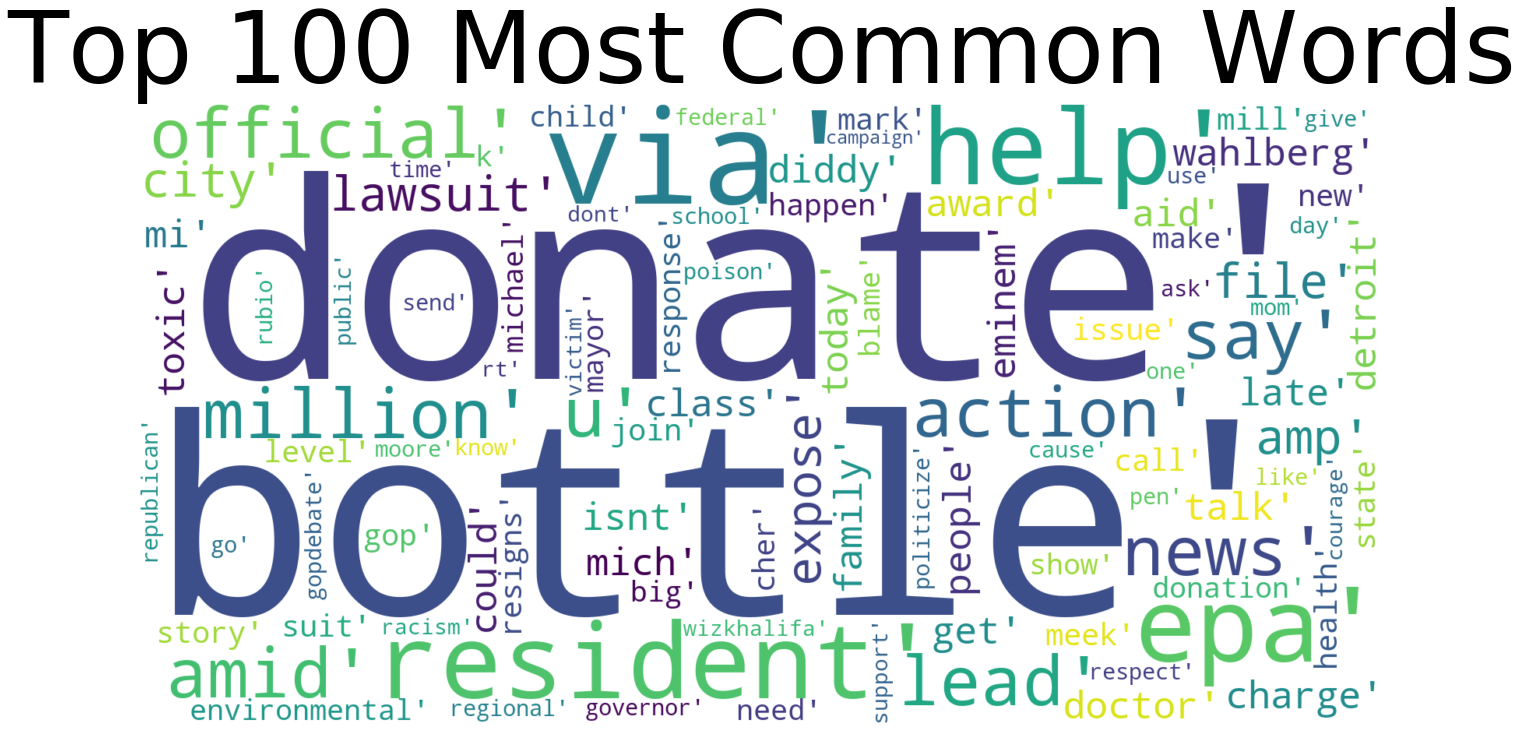



Topic: Arrest Governor Snyder


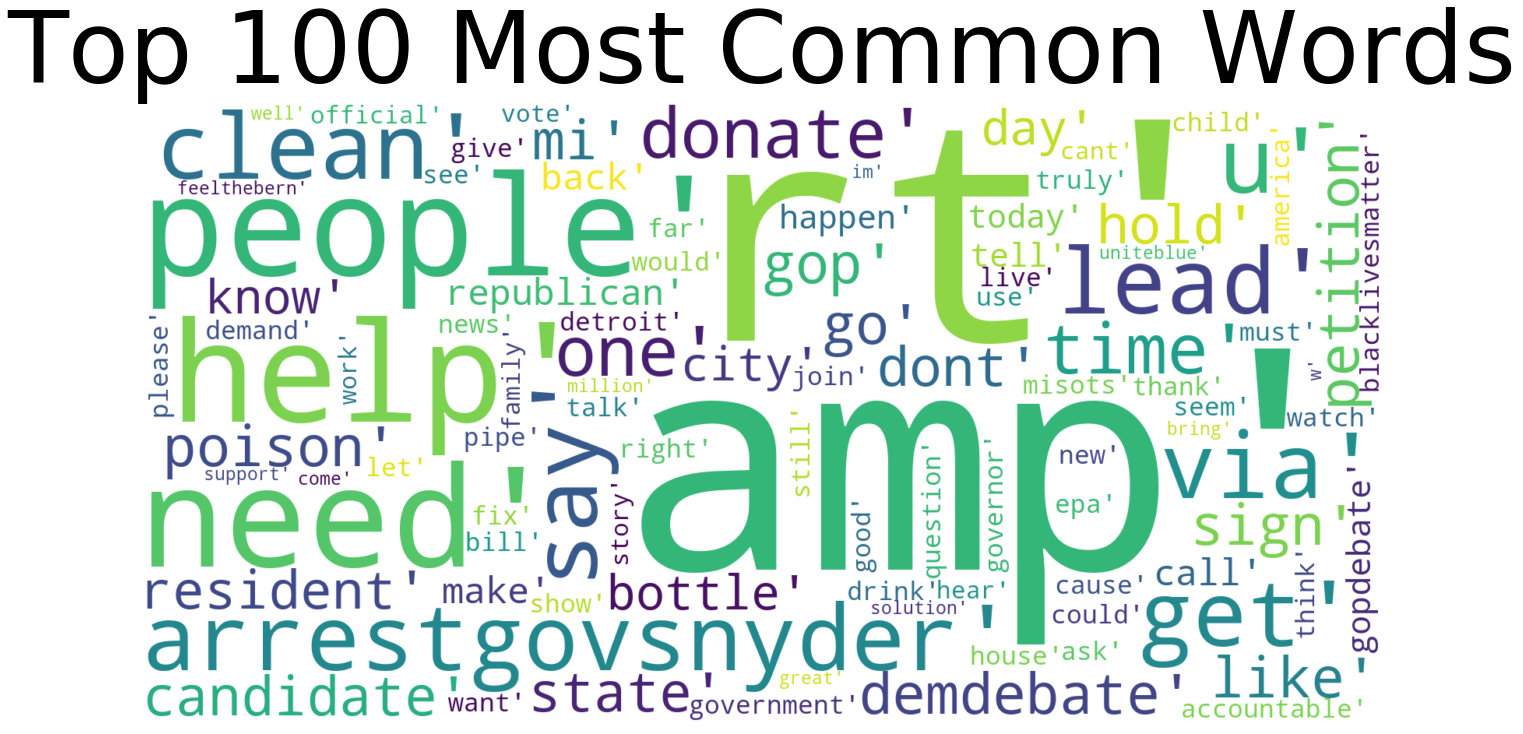



Topic: Conserve Water


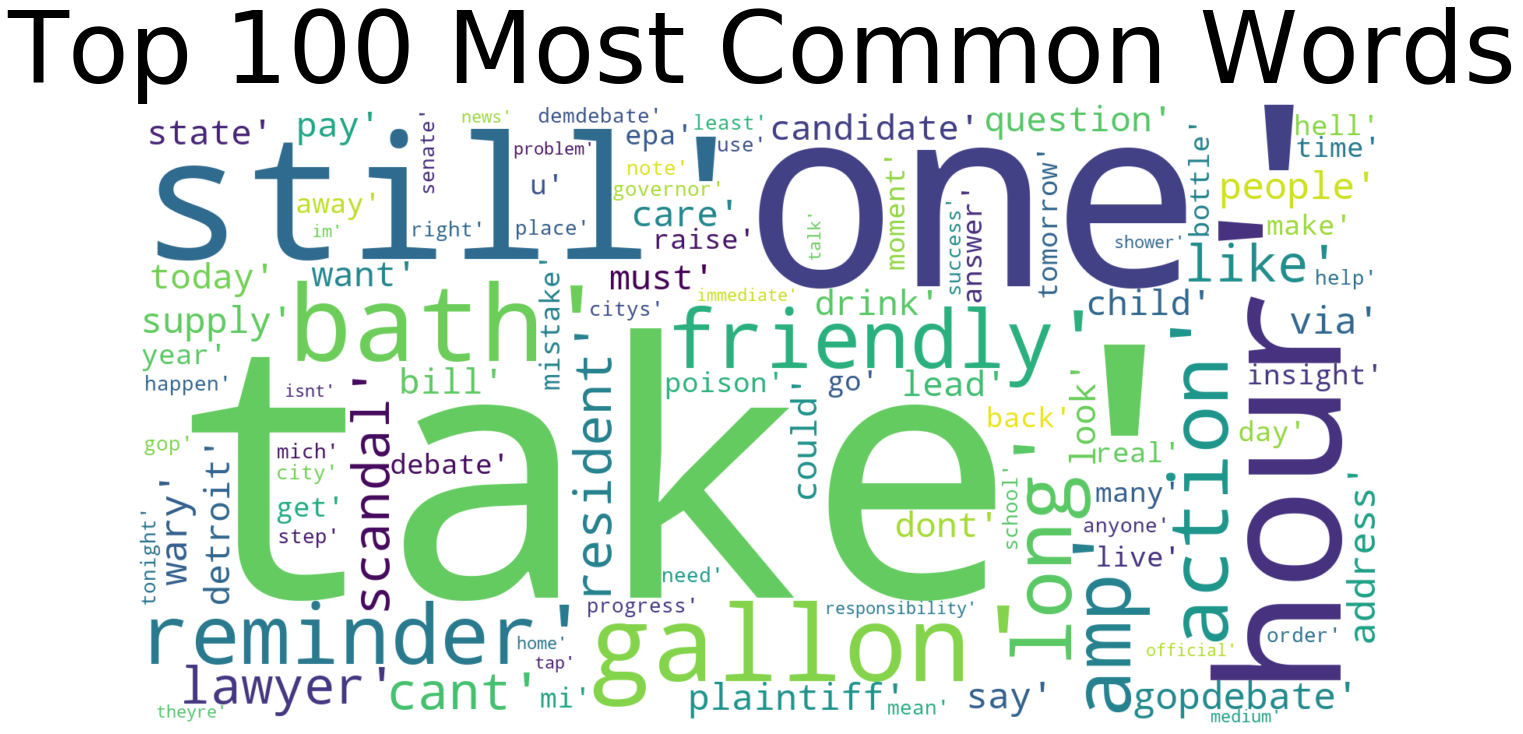



Topic: Black children's water is poisoned


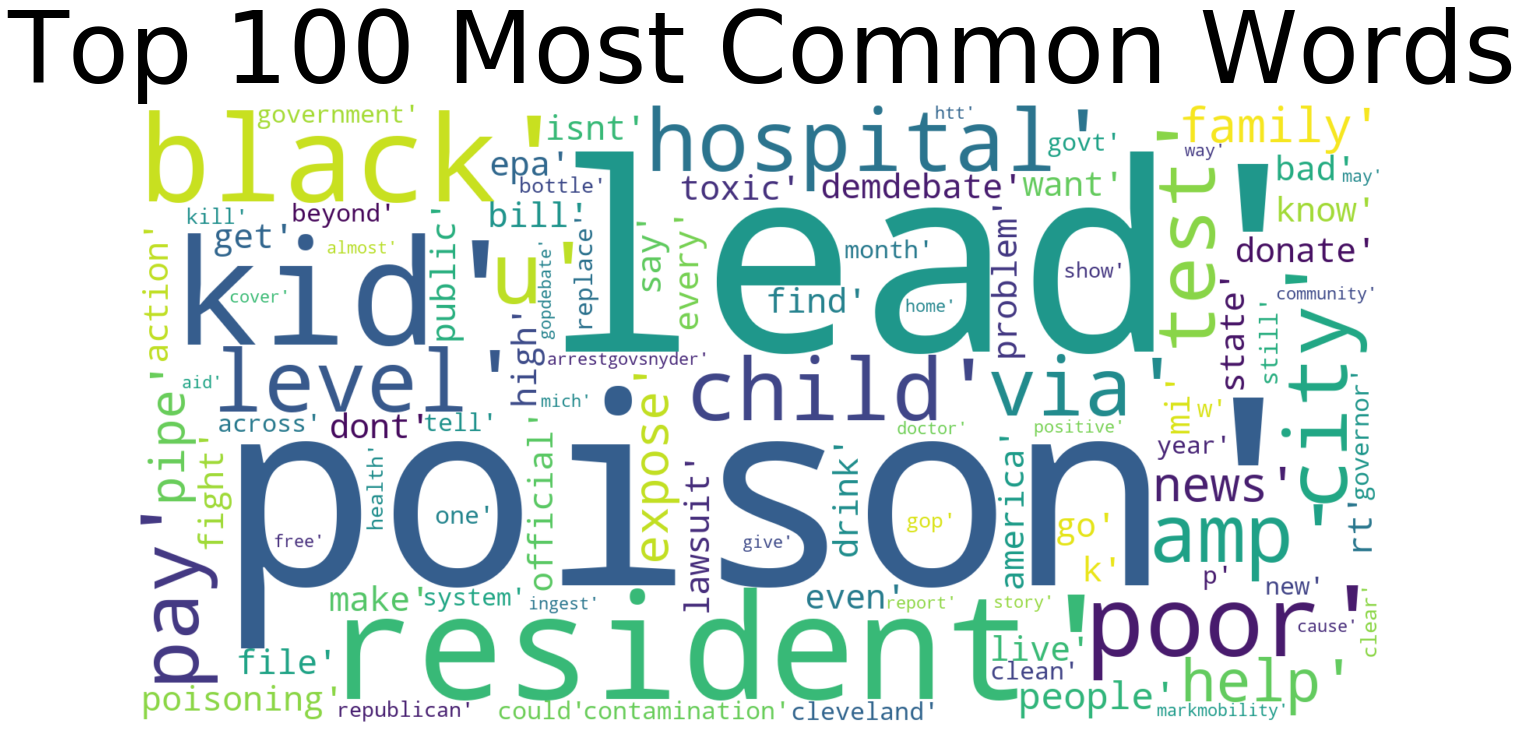



Topic: Not enough funding going to Flint water crisis


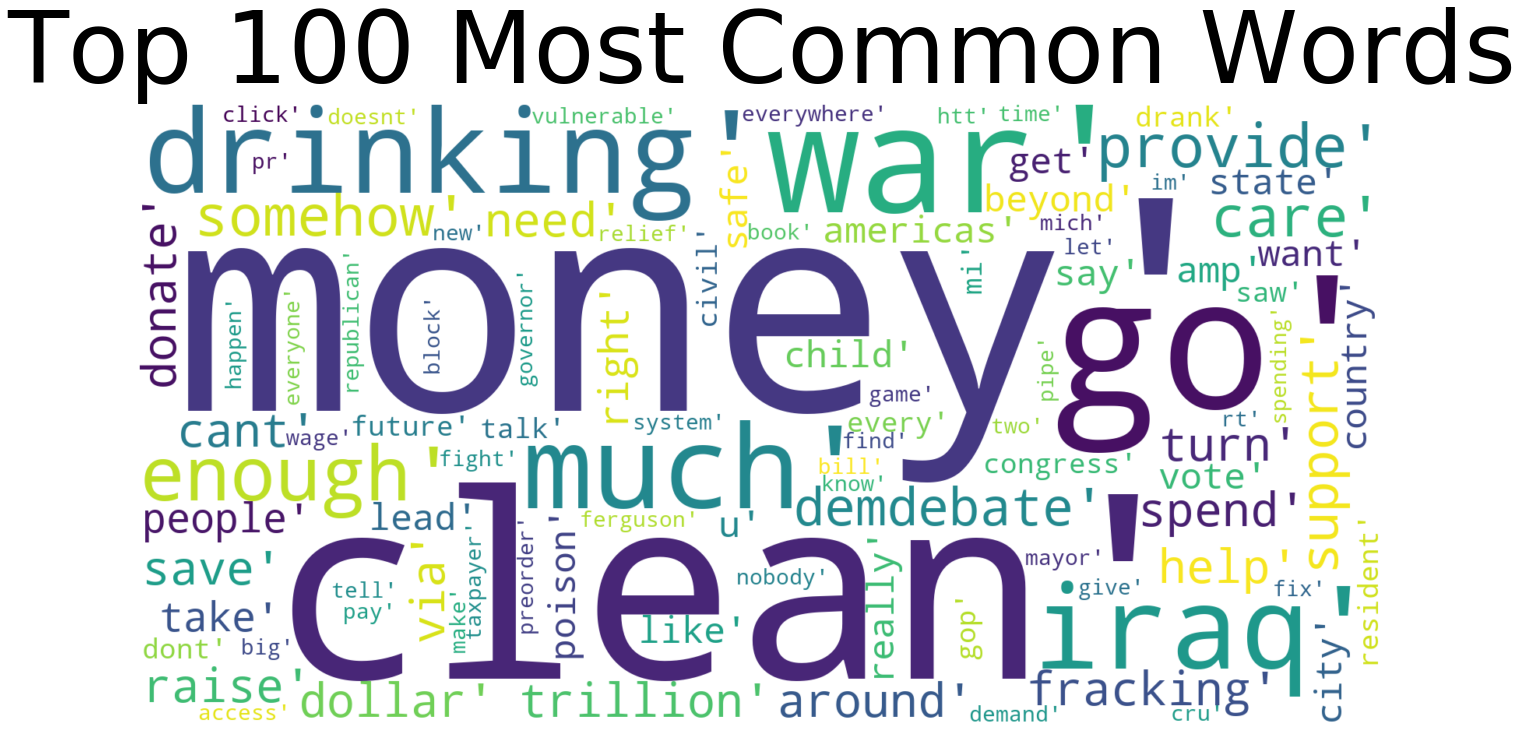



Topic: Help Flint people


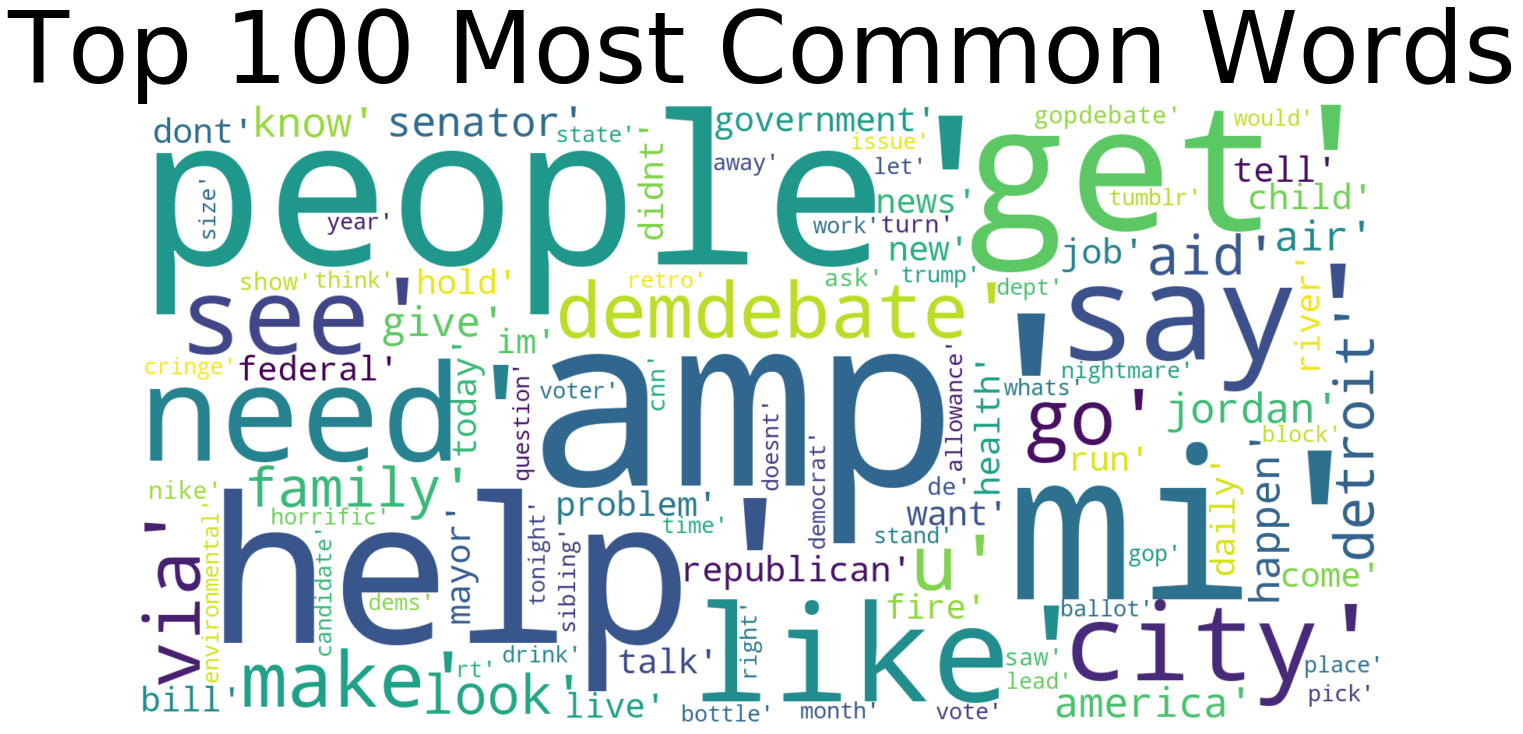



Topic: President Obama declares emergency in Michigan


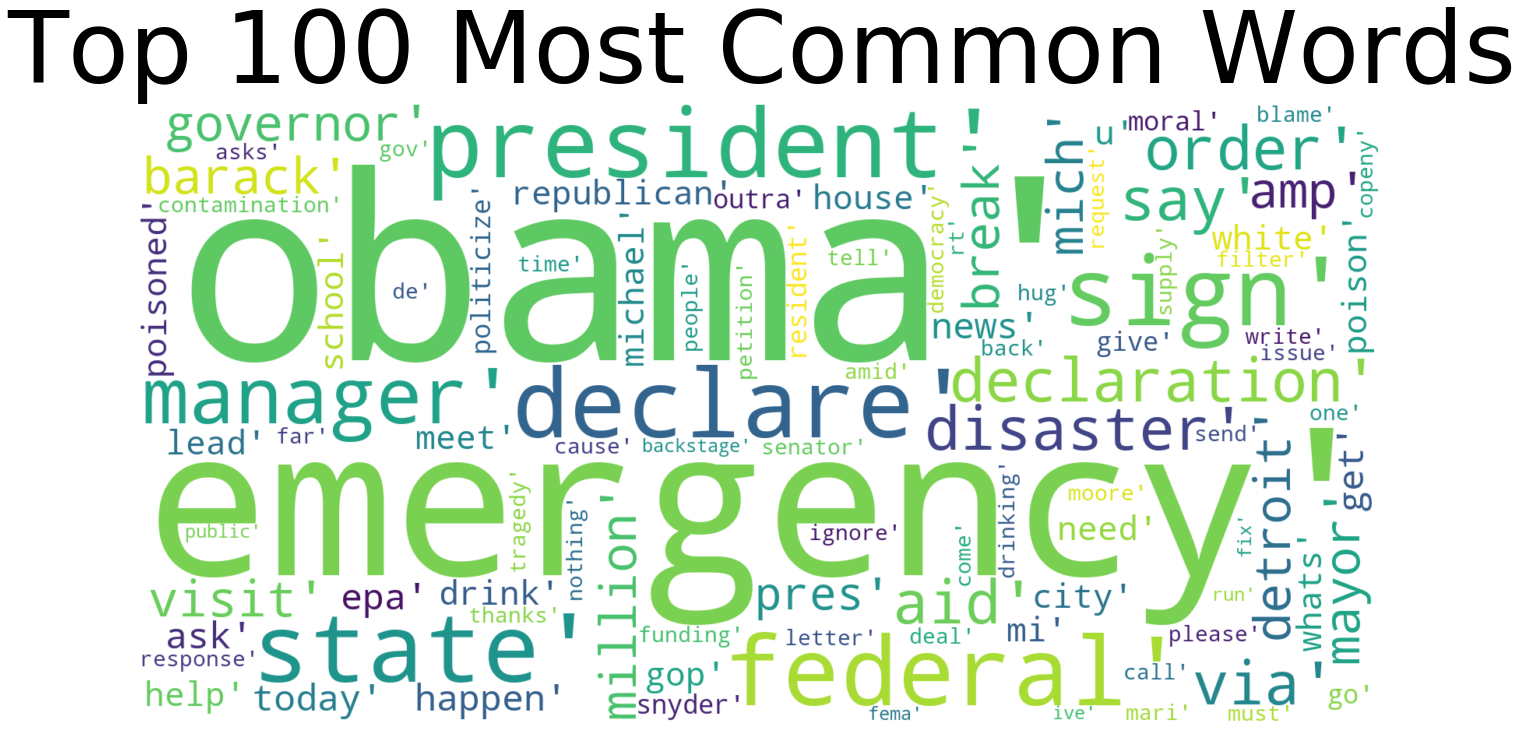



Topic: Governor Snyder should resign


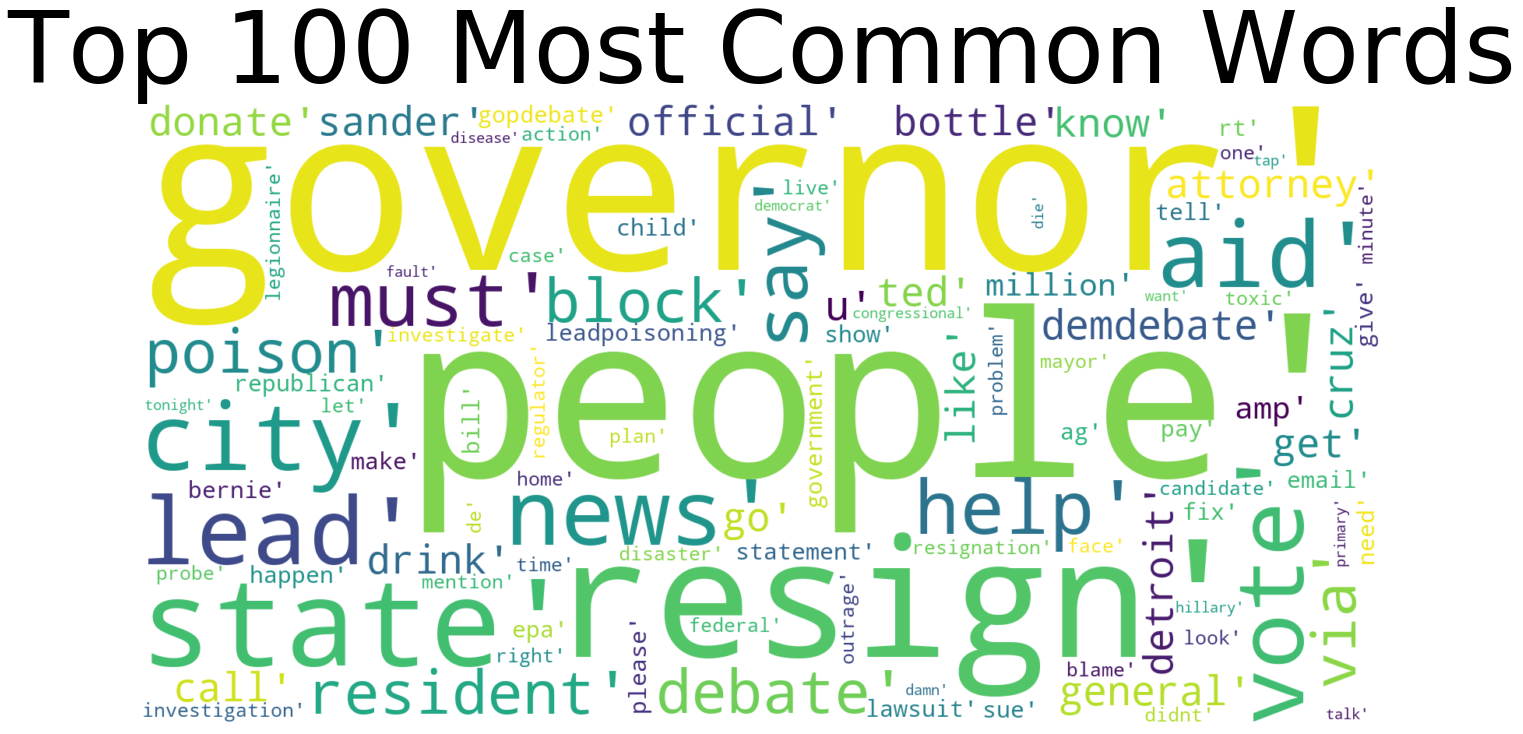



Topic: Democratic debate for votes


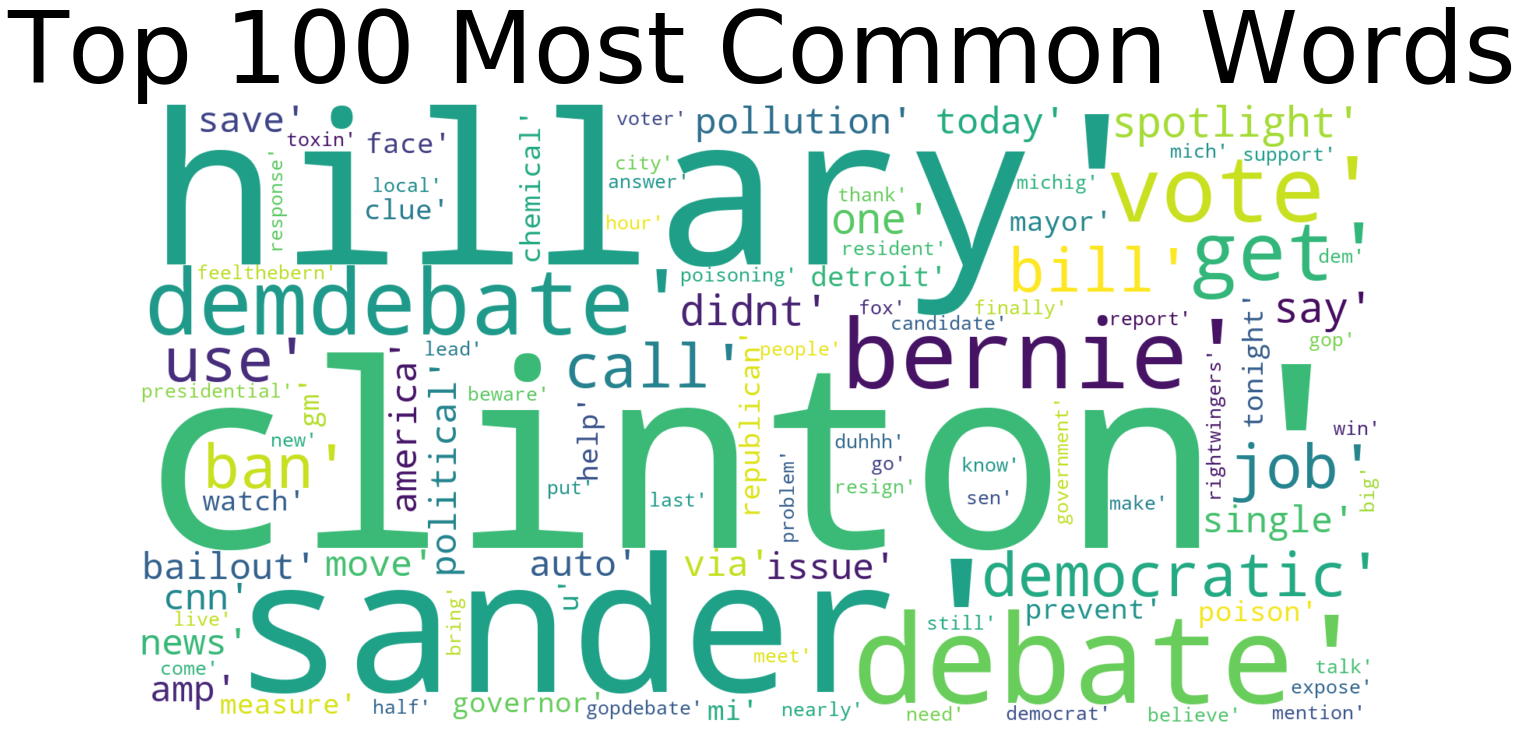



Topic: Governor Snyder shoudl resign and testify in front of Congress


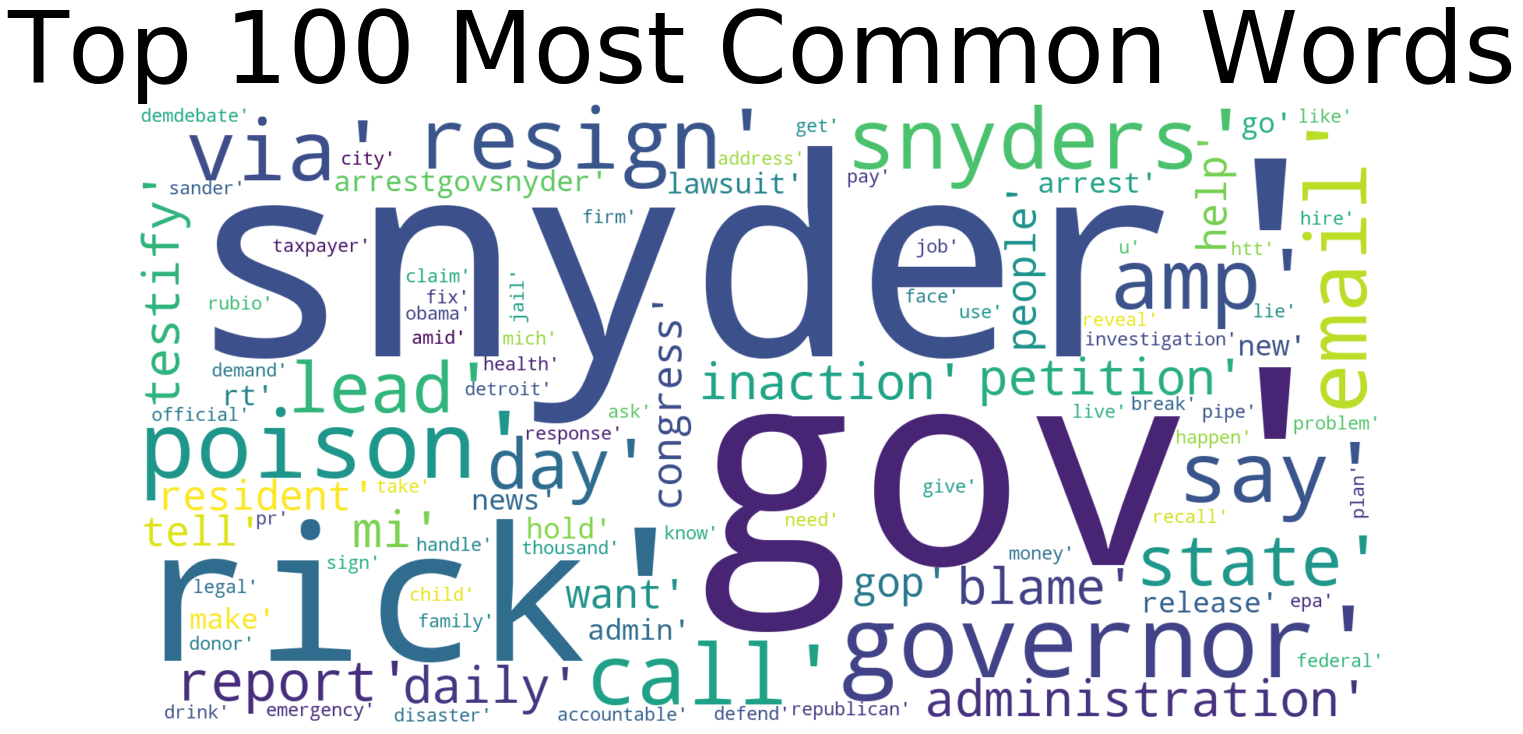

In [33]:
for x in range(0, 10):
    print("Topic: {}".format(nmf_remap[x]))
    create_word_cloud(topic_dfs[x])
    print("\n")

<h2>Retweets vs. Original Tweets

In [58]:
retweets_df = cleaned_df[cleaned_df['text'].str.contains('RT ')]
print("Percent of overall retweets: {}%".format(len(retweets_df.index) / len(cleaned_df.index) * 100))

Percent of overall retweets: 60.739047045993%


<h4>Retweets vs. Original Tweets by Topic

In [94]:
def get_retweets(df):
    retweets_df = df[df['text'].str.contains('RT ')]
    print("Percent of  retweets for this topic: {}%\n".format(len(retweets_df.index) / len(df.index) * 100))
    return len(retweets_df.index) / len(df.index) * 100

In [95]:
topic_to_retweets = {}
for x in range(0, 10):
    topic = nmf_remap[x]
    print("Topic: {}".format(topic))
    percentage = get_retweets(topic_dfs[x])
    topic_to_retweets[topic] = percentage

Topic: Donate to help water crisis
Percent of  retweets for this topic: 52.32286784460612%

Topic: Arrest Governor Snyder
Percent of  retweets for this topic: 67.01801681122535%

Topic: Conserve Water
Percent of  retweets for this topic: 72.36058859945712%

Topic: Black children's water is poisoned
Percent of  retweets for this topic: 70.52555098086704%

Topic: Not enough funding going to Flint water crisis
Percent of  retweets for this topic: 75.05836041561771%

Topic: Help Flint people
Percent of  retweets for this topic: 55.01317184987512%

Topic: President Obama declares emergency in Michigan
Percent of  retweets for this topic: 56.038479987208866%

Topic: Governor Snyder should resign
Percent of  retweets for this topic: 59.31426582351917%

Topic: Democratic debate for votes
Percent of  retweets for this topic: 62.7038672842831%

Topic: Governor Snyder shoudl resign and testify in front of Congress
Percent of  retweets for this topic: 61.710052732903655%



In [96]:
topic_to_retweets

{'Donate to help water crisis': 52.32286784460612,
 'Arrest Governor Snyder': 67.01801681122535,
 'Conserve Water': 72.36058859945712,
 "Black children's water is poisoned": 70.52555098086704,
 'Not enough funding going to Flint water crisis': 75.05836041561771,
 'Help Flint people': 55.01317184987512,
 'President Obama declares emergency in Michigan': 56.038479987208866,
 'Governor Snyder should resign': 59.31426582351917,
 'Democratic debate for votes': 62.7038672842831,
 'Governor Snyder shoudl resign and testify in front of Congress': 61.710052732903655}

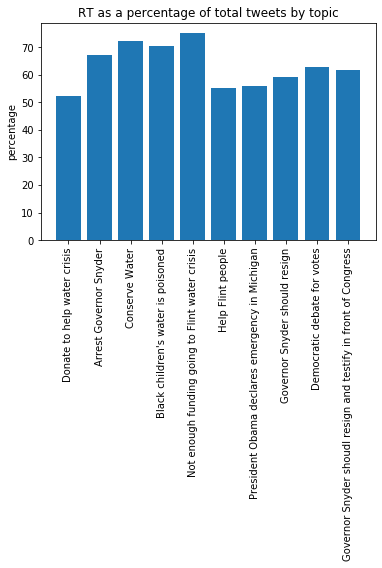

In [100]:
import matplotlib.pyplot as plt

D = topic_to_retweets
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()), rotation='vertical')
plt.ylabel('percentage')
plt.title('RT as a percentage of total tweets by topic')
plt.show()

<h4>Retweets by Month

In [101]:
# gets data by month
monthly_data = []
min_month = cleaned_df.created_at.min().month
max_month = cleaned_df.created_at.max().month

for i in range(min_month, max_month + 1):
    monthly_df = cleaned_df[cleaned_df['created_at'].dt.month == i]
    monthly_data.append(monthly_df)

In [104]:
month_to_retweets = {}
for i in range(min_month - 1, max_month):
    print("Month: {}".format(i + 1))
    percentage = get_retweets(monthly_data[i])
    month_to_retweets[i + 1] = percentage

Month: 1
Percent of  retweets for this topic: 61.88688543103241%

Month: 2
Percent of  retweets for this topic: 63.540074827422664%

Month: 3
Percent of  retweets for this topic: 60.11679508335711%

Month: 4
Percent of  retweets for this topic: 56.60798988088964%

Month: 5
Percent of  retweets for this topic: 59.434654919236415%

Month: 6
Percent of  retweets for this topic: 50.51247946170096%



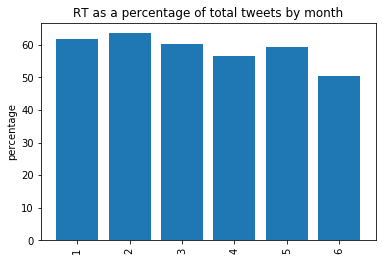

In [105]:
D = month_to_retweets
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()), rotation='vertical')
plt.ylabel('percentage')
plt.title('RT as a percentage of total tweets by month')
plt.show()

<h2>Analyzing the Occurence of 'Black' in Tweets

<h4>Overall Tweets

In [164]:
def get_racially_tinged_tweets(df):
    modified_df = df[df['lemma_str'].str.contains('black')]
    percentage = len(modified_df.index) / len(df.index) * 100
    print("Percent of overall tweets with the word 'black': {}".format(percentage))
    return percentage

In [166]:
percentage = get_racially_tinged_tweets(cleaned_df)

Percent of overall tweets with the word 'black': 2.5025008461509533


<h4>'Black' Tweets by Month

In [169]:
black_tweet_percentage_by_month = {}
for i in range(min_month - 1, max_month):
    print("Month: {}".format(i + 1))
    percentage = get_racially_tinged_tweets(monthly_data[i])
    black_tweet_percentage_by_month[i + 1] = percentage
    print("")

Month: 1
Percent of overall tweets with the word 'black': 3.593562318414055

Month: 2
Percent of overall tweets with the word 'black': 2.5346472045107236

Month: 3
Percent of overall tweets with the word 'black': 1.5046052169022006

Month: 4
Percent of overall tweets with the word 'black': 1.7033835775271424

Month: 5
Percent of overall tweets with the word 'black': 1.0352422907488987

Month: 6
Percent of overall tweets with the word 'black': 0.8215319615053596



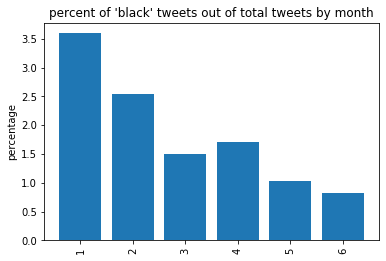

In [173]:
D = black_tweet_percentage_by_month
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()), rotation='vertical')
plt.ylabel('percentage')
plt.title("percent of 'black' tweets out of total tweets by month")
plt.show()